In [1]:
import pandas as pd
# import numpy as np
# import missingno as mno # needed to visualize missing values. install missingno into conda if import does not work!
# import altair as alt
# import seaborn as sns
# import matplotlib.pyplot as plt
import time
import datetime
import warnings
# import vegafusion as vf # also needs module vl-convert-python
# from sklearn.model_selection import train_test_split

# vf.enable()
warnings.simplefilter(action='ignore', category=FutureWarning)
# alt.data_transformers.disable_max_rows()

Data is provided through kaggle:

https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

Origin of data is:

http://ergast.com/mrd/

In [2]:
# Unpack archive.zip before executing this block!

# data path
path = "Data/archive/"

# declare dataframes, list and dictionary variable for later use
df_circuits = pd.read_csv(path + "circuits.csv")
df_constructor_results = pd.read_csv(path + "constructor_results.csv")
df_constructor_standings = pd.read_csv(path + "constructor_standings.csv")
df_constructors = pd.read_csv(path + "constructors.csv")
df_driver_standings = pd.read_csv(path + "driver_standings.csv")
df_drivers = pd.read_csv(path + "drivers.csv")
df_lap_times = pd.read_csv(path + "lap_times.csv")
df_pit_stops = pd.read_csv(path + "pit_stops.csv")
df_qualifying = pd.read_csv(path + "qualifying.csv")
df_races = pd.read_csv(path + "races.csv")
df_results = pd.read_csv(path + "results.csv")
df_seasons = pd.read_csv(path + "seasons.csv")
df_sprint_results = pd.read_csv(path + "sprint_results.csv")
df_status = pd.read_csv(path + "status.csv")

lst_df = [
df_circuits,
df_constructor_results,
df_constructor_standings,
df_constructors,
df_driver_standings,
df_drivers,
df_lap_times,
df_pit_stops,
df_qualifying,
df_races,
df_results,
df_seasons,
df_sprint_results,
df_status
]

dict_df = {
"df_circuits": df_circuits,
"df_constructor_results": df_constructor_results,
"df_constructor_standings": df_constructor_standings,
"df_constructors": df_constructors,
"df_driver_standings": df_driver_standings,
"df_drivers": df_drivers,
"df_lap_times": df_lap_times,
"df_pit_stops": df_pit_stops,
"df_qualifying": df_qualifying,
"df_races": df_races,
"df_results": df_results,
"df_seasons": df_seasons,
"df_sprint_results": df_sprint_results,
"df_status": df_status
}

In [3]:
# number of dataframes
len(lst_df)

14

First look at all dataframes

In [4]:
# contains geodata about every circuit where F1 races take place
df_circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [5]:
df_circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     object 
 8   url         77 non-null     object 
dtypes: float64(2), int64(1), object(6)
memory usage: 5.5+ KB


In [6]:
# Race results of the constructor's championship
df_constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


From Wikipedia regarding the constructors championship:
https://en.wikipedia.org/wiki/List_of_Formula_One_World_Constructors_Champions

The World Constructors’ Championship is presented by the FIA to the most successful F1 constructor over the course of the season through a points system based on individual Grand Prix results. Points are calculated by adding points scored in each race by any driver for that constructor

In [7]:
df_constructor_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12170 entries, 0 to 12169
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12170 non-null  int64  
 1   raceId                12170 non-null  int64  
 2   constructorId         12170 non-null  int64  
 3   points                12170 non-null  float64
 4   status                12170 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 475.5+ KB


In [8]:
# Final standings of the constructor's championship
df_constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [9]:
df_constructor_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12941 entries, 0 to 12940
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12941 non-null  int64  
 1   raceId                  12941 non-null  int64  
 2   constructorId           12941 non-null  int64  
 3   points                  12941 non-null  float64
 4   position                12941 non-null  int64  
 5   positionText            12941 non-null  object 
 6   wins                    12941 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 707.8+ KB


In [10]:
# Constructors in F1
df_constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [11]:
df_constructors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [12]:
# Final standings of the driver's championship
df_driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


From Wikipedia regarding the drivers championship:

https://en.wikipedia.org/wiki/List_of_Formula_One_World_Drivers_Champions

The World Drivers' Championship is presented by the FIA to the most successful Formula One driver over the course of a season through a points system based on individual Grand Prix results. 

In [13]:
df_driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33902 entries, 0 to 33901
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33902 non-null  int64  
 1   raceId             33902 non-null  int64  
 2   driverId           33902 non-null  int64  
 3   points             33902 non-null  float64
 4   position           33902 non-null  int64  
 5   positionText       33902 non-null  object 
 6   wins               33902 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


In [14]:
# Drivers in F1
df_drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [15]:
df_drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [16]:
# Lap times in F1

df_lap_times.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [17]:
df_lap_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538121 entries, 0 to 538120
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        538121 non-null  int64 
 1   driverId      538121 non-null  int64 
 2   lap           538121 non-null  int64 
 3   position      538121 non-null  int64 
 4   time          538121 non-null  object
 5   milliseconds  538121 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 24.6+ MB


In [18]:
# Pit stops in F1
df_pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [19]:
df_pit_stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9634 entries, 0 to 9633
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        9634 non-null   int64 
 1   driverId      9634 non-null   int64 
 2   stop          9634 non-null   int64 
 3   lap           9634 non-null   int64 
 4   time          9634 non-null   object
 5   duration      9634 non-null   object
 6   milliseconds  9634 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 527.0+ KB


In [20]:
# Qualifyiyng in F1

df_qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


From Wikipedia:

https://en.wikipedia.org/wiki/Formula_One

Qualifying
For much of the sport's history, qualifying sessions differed little from practice sessions; drivers would have one or more sessions in which to set their fastest time, with the grid order determined by each driver's best single lap, with the fastest getting first place on the grid, referred to as pole position. From 1996 to 2002, the format was a one-hour shootout. This approach lasted until the end of 2002 before the rules were changed again because the teams were not running in the early part of the session to take advantage of better track conditions later on.

In [21]:
df_qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9575 entries, 0 to 9574
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9575 non-null   int64 
 1   raceId         9575 non-null   int64 
 2   driverId       9575 non-null   int64 
 3   constructorId  9575 non-null   int64 
 4   number         9575 non-null   int64 
 5   position       9575 non-null   int64 
 6   q1             9567 non-null   object
 7   q2             9424 non-null   object
 8   q3             9276 non-null   object
dtypes: int64(6), object(3)
memory usage: 673.4+ KB


In [22]:
# Races in F1
df_races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [23]:
df_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1102 non-null   int64 
 1   year         1102 non-null   int64 
 2   round        1102 non-null   int64 
 3   circuitId    1102 non-null   int64 
 4   name         1102 non-null   object
 5   date         1102 non-null   object
 6   time         1102 non-null   object
 7   url          1102 non-null   object
 8   fp1_date     1102 non-null   object
 9   fp1_time     1102 non-null   object
 10  fp2_date     1102 non-null   object
 11  fp2_time     1102 non-null   object
 12  fp3_date     1102 non-null   object
 13  fp3_time     1102 non-null   object
 14  quali_date   1102 non-null   object
 15  quali_time   1102 non-null   object
 16  sprint_date  1102 non-null   object
 17  sprint_time  1102 non-null   object
dtypes: int64(4), object(14)
memory usage: 155.1+ KB


In [24]:
# Results of F1 races
df_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [25]:
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25840 non-null  int64  
 1   raceId           25840 non-null  int64  
 2   driverId         25840 non-null  int64  
 3   constructorId    25840 non-null  int64  
 4   number           25840 non-null  object 
 5   grid             25840 non-null  int64  
 6   position         25840 non-null  object 
 7   positionText     25840 non-null  object 
 8   positionOrder    25840 non-null  int64  
 9   points           25840 non-null  float64
 10  laps             25840 non-null  int64  
 11  time             25840 non-null  object 
 12  milliseconds     25840 non-null  object 
 13  fastestLap       25840 non-null  object 
 14  rank             25840 non-null  object 
 15  fastestLapTime   25840 non-null  object 
 16  fastestLapSpeed  25840 non-null  object 
 17  statusId    

In [26]:
df_seasons.head()

,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


In [27]:
# Seasons of F1
df_seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    74 non-null     int64 
 1   url     74 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [28]:
df_sprint_results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [29]:
# Results of F1 sprint races
df_sprint_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   resultId        120 non-null    int64 
 1   raceId          120 non-null    int64 
 2   driverId        120 non-null    int64 
 3   constructorId   120 non-null    int64 
 4   number          120 non-null    int64 
 5   grid            120 non-null    int64 
 6   position        120 non-null    object
 7   positionText    120 non-null    object
 8   positionOrder   120 non-null    int64 
 9   points          120 non-null    int64 
 10  laps            120 non-null    int64 
 11  time            120 non-null    object
 12  milliseconds    120 non-null    object
 13  fastestLap      120 non-null    object
 14  fastestLapTime  120 non-null    object
 15  statusId        120 non-null    int64 
dtypes: int64(10), object(6)
memory usage: 15.1+ KB


From the US Sun:

https://www.the-sun.com/sport/3287658/what-is-f1-sprint-race-austrian-grand-prix/

What is F1 Sprint?
Essentially, F1 Sprint is a mini race which will be run over 100km on Saturday evening, with the usual Grand Prix distance.

F1 Sprint is designed to be a flat-out race from start to finish, and is set to excite the thousands of fans in attendance.

In [30]:
# Mapping of statusId to text
df_status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [31]:
df_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   statusId  139 non-null    int64 
 1   status    139 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [32]:
# check which dataframe contains which Id or the year column
for name,df in dict_df.items():
    print(name + ":")
    id_cols = [col for col in df.columns if 'Id' in col or "year" in col]
    print(id_cols)

df_circuits:
['circuitId']
df_constructor_results:
['constructorResultsId', 'raceId', 'constructorId']
df_constructor_standings:
['constructorStandingsId', 'raceId', 'constructorId']
df_constructors:
['constructorId']
df_driver_standings:
['driverStandingsId', 'raceId', 'driverId']
df_drivers:
['driverId']
df_lap_times:
['raceId', 'driverId']
df_pit_stops:
['raceId', 'driverId']
df_qualifying:
['qualifyId', 'raceId', 'driverId', 'constructorId']
df_races:
['raceId', 'year', 'circuitId']
df_results:
['resultId', 'raceId', 'driverId', 'constructorId', 'statusId']
df_seasons:
['year']
df_sprint_results:
['resultId', 'raceId', 'driverId', 'constructorId', 'statusId']
df_status:
['statusId']


In [33]:
# check which Id or the year column is present in which dataframe

ids = {
    'raceId': [],
    'driverId': [],
    'constructorId': [],
    'constructorResultsId': [],
    'circuitId': [],
    'driverStandingsId': [],
    'qualifyId': [],
    'resultId': [],
    'statusId': [],
    'year': []
}


for name, df in dict_df.items():
    for id in ids:
        if id in df.columns:
            ids[id].append(name)


print("Dataframes with each ID:")
for id, df_list in ids.items():
    print(f"{id}: {df_list} \n")


Dataframes with each ID:
raceId: ['df_constructor_results', 'df_constructor_standings', 'df_driver_standings', 'df_lap_times', 'df_pit_stops', 'df_qualifying', 'df_races', 'df_results', 'df_sprint_results'] 

driverId: ['df_driver_standings', 'df_drivers', 'df_lap_times', 'df_pit_stops', 'df_qualifying', 'df_results', 'df_sprint_results'] 

constructorId: ['df_constructor_results', 'df_constructor_standings', 'df_constructors', 'df_qualifying', 'df_results', 'df_sprint_results'] 

constructorResultsId: ['df_constructor_results'] 

circuitId: ['df_circuits', 'df_races'] 

driverStandingsId: ['df_driver_standings'] 

qualifyId: ['df_qualifying'] 

resultId: ['df_results', 'df_sprint_results'] 

statusId: ['df_results', 'df_sprint_results', 'df_status'] 

year: ['df_races', 'df_seasons'] 



# Join

we merge the dataframes together to make further analysis more accesible.

The Ids 'constructorResultsId', 'qualifyId' and 'driverStandingsId' that are only present in one dataframe each can be ignored since they don't provide any additional information (apart from being a primary key of that dataframe)

In [34]:
# drop unneded columns in drivers and driver_standings df
df_drivers.drop(["driverRef",'code','url'],axis= 1, inplace=True)
df_driver_standings.drop(["driverStandingsId",'positionText','position'],axis= 1, inplace=True)

In [35]:
# group laptimes of drivers for each different race by taking the mean over all laps of a driver for specific race
# milliseconds could be converted into minutes:seconds.milliseconds format if needed
df_grouped_lap_times = df_lap_times.groupby(['driverId','raceId'])['milliseconds'].mean().reset_index()
# rename column for more clarity
df_grouped_lap_times.rename({'milliseconds':'avgMillisecondsLap'},axis=1, inplace= True)

In [36]:
# change pit stops column names for more clarity
df_pit_stops.drop("duration",axis= 1, inplace=True)
df_pit_stops.rename({'stop':'pitStop','lap':'lapOfPitStop','time':'timeOfPitStop','milliseconds':'MillisecondsOfPitStop'}, axis=1, inplace=True)

In [37]:
# drop and change column names in results df for clarity
df_results.drop(['resultId','constructorId','number','positionText','position','points'],axis= 1, inplace=True)
df_results.rename({
    'grid':'startingPos',
    'positionOrder':'finalPos',
    'laps':'totalLaps',
    'time':'timeToFinish',
    'milliseconds':'millisecondsToFinish',
    'rank':'fastestLapRank'
    },axis=1, inplace= True)

In [38]:
# keep only relevant colums of races df
df_races=df_races[['raceId','year','round','circuitId','name','date','time']]
df_races.rename({'round':'raceNumber'},axis=1, inplace= True)

C:\Users\saloc\AppData\Local\Temp\ipykernel_11004\2268403577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_races.rename({'round':'raceNumber'},axis=1, inplace= True)


In [39]:
# drop columns in circuits df
df_circuits.drop(['circuitRef','url','name'],axis= 1, inplace=True)

Join step by step

In [40]:
df_driverWithStandings = df_drivers.merge(df_driver_standings,on="driverId") 

In [41]:
df_driversWithStandings_Times = df_driverWithStandings.merge(df_grouped_lap_times,on=["driverId","raceId"]) 

In [42]:
df_driversWithStandings_Times_PitStops = df_driversWithStandings_Times.merge(df_pit_stops,on=["driverId","raceId"]) 

In [43]:
df_driversWithStandings_Times_PitStops_results = df_driversWithStandings_Times_PitStops.merge(
    df_results,on=["driverId","raceId"]) 

In [44]:
df_driversWithStandings_Times_PitStops_results_races = df_driversWithStandings_Times_PitStops_results.merge(
    df_races,on=["raceId"]) 

In [45]:
df_driversWithStandings_Times_PitStops_results_races_status = df_driversWithStandings_Times_PitStops_results_races.merge(
    df_status,on=["statusId"]) 

In [46]:
df_driversWithStandings_Times_PitStops_results_races_status_circuits = df_driversWithStandings_Times_PitStops_results_races_status.merge(
    df_circuits,on=["circuitId"]) 

In [47]:
df_driver_final = df_driversWithStandings_Times_PitStops_results_races_status_circuits
df_driver_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 0 to 9630
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   driverId               9631 non-null   int64  
 1   number                 9631 non-null   object 
 2   forename               9631 non-null   object 
 3   surname                9631 non-null   object 
 4   dob                    9631 non-null   object 
 5   nationality            9631 non-null   object 
 6   raceId                 9631 non-null   int64  
 7   points                 9631 non-null   float64
 8   wins                   9631 non-null   int64  
 9   avgMillisecondsLap     9631 non-null   float64
 10  pitStop                9631 non-null   int64  
 11  lapOfPitStop           9631 non-null   int64  
 12  timeOfPitStop          9631 non-null   object 
 13  MillisecondsOfPitStop  9631 non-null   int64  
 14  startingPos            9631 non-null   int64  
 15  fina

In [48]:
# export dataframe as csv
df_driver_final = df_driversWithStandings_Times_PitStops_results_races_status_circuits
for col in df_driver_final.columns:
    if "Id" in col:
        df_driver_final.drop(col,axis=1,inplace=True)
df_driver_final.to_csv("Data/driver_final.csv", index = False)

In [49]:
df_driver_final

,number,forename,surname,dob,nationality,points,wins,avgMillisecondsLap,pitStop,lapOfPitStop,...,raceNumber,name,date,time,status,location,country,lat,lng,alt
0,44,Lewis,Hamilton,1985-01-07,British,18.0,0,88800.824561,1,17,...,1,Australian Grand Prix,2017-03-26,05:00:00,Finished,Melbourne,Australia,-37.8497,144.9680,10
1,7,Kimi,Räikkönen,1979-10-17,Finnish,12.0,0,89018.684211,1,26,...,1,Australian Grand Prix,2017-03-26,05:00:00,Finished,Melbourne,Australia,-37.8497,144.9680,10
2,19,Felipe,Massa,1981-04-25,Brazilian,8.0,0,90088.736842,1,20,...,1,Australian Grand Prix,2017-03-26,05:00:00,Finished,Melbourne,Australia,-37.8497,144.9680,10
3,5,Sebastian,Vettel,1987-07-03,German,25.0,1,88625.824561,1,23,...,1,Australian Grand Prix,2017-03-26,05:00:00,Finished,Melbourne,Australia,-37.8497,144.9680,10
4,77,Valtteri,Bottas,1989-08-28,Finnish,15.0,0,88823.192982,1,25,...,1,Australian Grand Prix,2017-03-26,05:00:00,Finished,Melbourne,Australia,-37.8497,144.9680,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9626,10,Pierre,Gasly,1996-02-07,French,6.0,0,101927.555556,2,40,...,5,Miami Grand Prix,2022-05-08,19:30:00,Suspension,Miami,USA,25.9581,-80.2389,\N
9627,5,Sebastian,Vettel,1987-07-03,German,4.0,0,100720.703704,1,41,...,5,Miami Grand Prix,2022-05-08,19:30:00,Collision,Miami,USA,25.9581,-80.2389,\N
9628,4,Lando,Norris,1999-11-13,British,35.0,0,96139.538462,1,18,...,5,Miami Grand Prix,2022-05-08,19:30:00,Collision,Miami,USA,25.9581,-80.2389,\N
9629,20,Kevin,Magnussen,1992-10-05,Danish,15.0,0,100158.267857,1,12,...,5,Miami Grand Prix,2022-05-08,19:30:00,Front wing,Miami,USA,25.9581,-80.2389,\N


In [50]:
df_driver_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9631 entries, 0 to 9630
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   number                 9631 non-null   object 
 1   forename               9631 non-null   object 
 2   surname                9631 non-null   object 
 3   dob                    9631 non-null   object 
 4   nationality            9631 non-null   object 
 5   points                 9631 non-null   float64
 6   wins                   9631 non-null   int64  
 7   avgMillisecondsLap     9631 non-null   float64
 8   pitStop                9631 non-null   int64  
 9   lapOfPitStop           9631 non-null   int64  
 10  timeOfPitStop          9631 non-null   object 
 11  MillisecondsOfPitStop  9631 non-null   int64  
 12  startingPos            9631 non-null   int64  
 13  finalPos               9631 non-null   int64  
 14  totalLaps              9631 non-null   int64  
 15  time

# First Analysis

First bar, scatter and regression plots

In [51]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# add fullname column
df_driver_final['fullname'] = df_driver_final['forename'] + ' ' + df_driver_final['surname']
# count number of wins for each driver
df_wins = df_driver_final.groupby(['fullname'])[['wins']].sum().sort_values(['wins'], ascending=[False]).reset_index()

In [79]:
df_wins = df_driver_final[df_driver_final['finalPos'] == 1].groupby(['fullname'])['finalPos'].count().reset_index(name='wins').sort_values(['wins'],ascending=[False])
df_wins

,fullname,wins
8,Lewis Hamilton,162
14,Sebastian Vettel,92
10,Max Verstappen,63
11,Nico Rosberg,44
2,Daniel Ricciardo,17
4,Fernando Alonso,17
6,Jenson Button,17
16,Valtteri Bottas,13
1,Charles Leclerc,9
15,Sergio Pérez,9


<Axes: xlabel='wins', ylabel='fullname'>

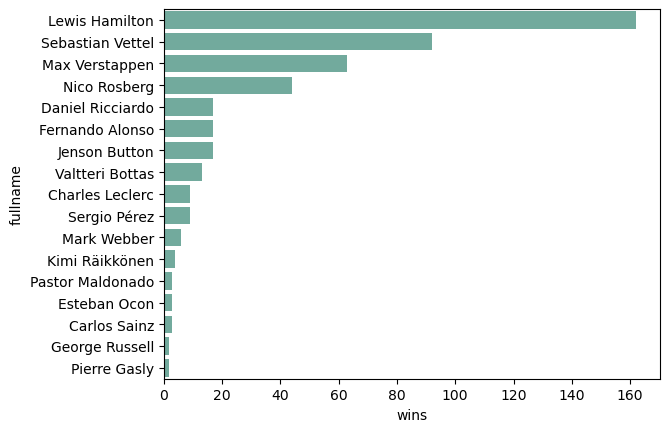

In [85]:
sns.barplot(
    y="fullname", 
    x="wins", 
    data=df_wins, 
    #estimator=sum, 
    ci=None, 
    color='#69b3a2')

In [ ]:
df_driver_final_startEnd = df_driver_final[['startingPos','finalPos']]

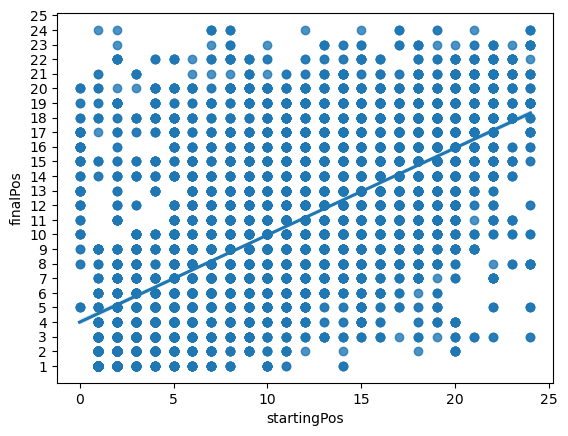

In [65]:
sns.regplot(x=df_driver_final_startEnd["startingPos"], y=df_driver_final_startEnd["finalPos"])
y_ticks = list(range(1,26))
plt.yticks(y_ticks)
plt.show()

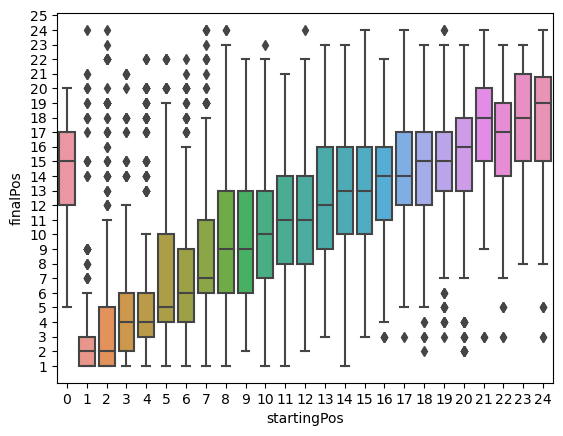

In [66]:
sns.boxplot(x=df_driver_final_startEnd["startingPos"], y=df_driver_final_startEnd["finalPos"])
plt.yticks(y_ticks)
plt.show()

In [85]:
# count rows where starting and end position are the same
startEqualFinalPos = sum(df_driver_final_startEnd.startingPos == df_driver_final_startEnd.finalPos)
# count rows where driver got a worse final position compared to starting position
startHigherFinalPos = sum(df_driver_final_startEnd.startingPos > df_driver_final_startEnd.finalPos)
# count rows where driver got a better final position compared to starting position
startLowerFinalPos = sum(df_driver_final_startEnd.startingPos < df_driver_final_startEnd.finalPos)
# count rows where driver did not finish first despite starting at pole position 
lostPolePosition = sum((df_driver_final_startEnd.startingPos == 1) & (df_driver_final_startEnd.finalPos != 1))
# count rows where driver finished first while starting at pole position
keptPolePosition = sum((df_driver_final_startEnd.startingPos == 1) & (df_driver_final_startEnd.finalPos == 1))

totalRows = len(df_driver_final_startEnd)
RowsPolePosition = sum(df_driver_final_startEnd.startingPos == 1)

# calculate percentages
RelationStartEqualFinal = round(100 * startEqualFinalPos / totalRows,2)
RelationStartHigherFinal = round(100 * startHigherFinalPos / totalRows,2)
RelationStartLowerFinal = round(100 * startLowerFinalPos / totalRows,2)
RelationlostPolePosition = round(100 * lostPolePosition / RowsPolePosition,2)
RelationkeptPolePosition = round(100 * keptPolePosition / RowsPolePosition,2)


In [93]:
data_Rel = {'Position': ["StartEqualFinal",'StartHigherFinal',"StartLowerFinal"],
            'Percentage': [RelationStartEqualFinal,RelationStartHigherFinal,RelationStartLowerFinal]
            }    

df_relationStartFinalPos = pd.DataFrame(data_Rel)

In [102]:
data_Pole = {'Pole': ["LostPolePosition",'KeptPolePosition'],
             'Percentage': [RelationlostPolePosition,RelationkeptPolePosition]
             }    

df_relationPole = pd.DataFrame(data_Pole)

<Axes: xlabel='Position', ylabel='Percentage'>

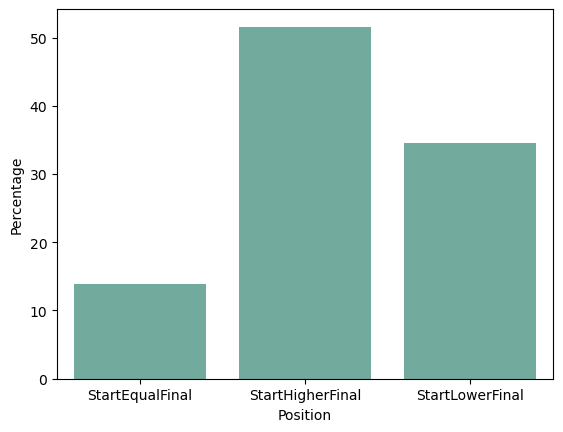

In [103]:
sns.barplot(
    y="Percentage", 
    x="Position", 
    data=df_relationStartFinalPos, 
    #estimator=sum, 
    ci=None, 
    color='#69b3a2')

<Axes: xlabel='Pole', ylabel='Percentage'>

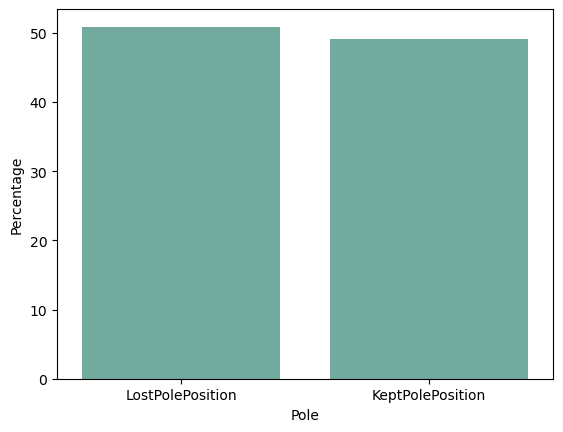

In [104]:
sns.barplot(
    y="Percentage", 
    x="Pole", 
    data=df_relationPole, 
    #estimator=sum, 
    ci=None, 
    color='#69b3a2')

Notizen:

- Spalten Sortierung anpassen, wenn gewollt
- Gleiches Vorgehen mit constructor Daten moeglich
- Qualifying und Sprint Result Daten koennten noch gejoined werden, wenn sinnvoll
- Join in SAP DWC nachbauen

In [116]:
df_qualifying

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9570,9628,1096,825,210,20,16,1:25.834,\N,\N
9571,9629,1096,842,213,10,17,1:25.859,\N,\N
9572,9630,1096,822,51,77,18,1:25.892,\N,\N
9573,9631,1096,848,3,23,19,1:26.028,\N,\N


In [117]:
df_sprint_results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,1095,840,117,18,15,16,16,16,0,24,+50.700,1862007,4,1:15.425,1
116,117,1095,839,214,31,6,17,17,17,0,24,+51.756,1863063,5,1:16.097,1
117,118,1095,4,214,14,7,18,18,18,0,24,+53.985,1865292,5,1:14.764,1
118,119,1095,849,3,6,16,19,19,19,0,24,+1:16.850,1888157,4,1:16.525,1
